In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Diode

The following is excerpted from [Designing Analog Chips](http://designinganalogchips.com/) by Hans Camenzind.

Silicon has $5 \times 10^{22}$ atoms per cubic centimeter. A doping level can easily be as low as $5 \times 10^{15}$ boron or phosphorus atoms per cubic centimeter, i.e. one dopant atom for every 10 million silicon atoms.

The resistivity is about 1 Ohm-cm for phosphorus (n-type) and 3 Ohm-cm for boron (p-type). For comparison, aluminum has a resistivity of 2.8 microOhm-cm, copper 1.7 microOhm-cm. Doped silicon resistivity is about 1 million times greater than a good conductor.

$I_d = I_s \left(e^{\frac{V_d q}{k T}} - 1 \right) $

$V_d = \frac{k T}{q} ln \left( \frac{I_d}{I_s} + 1\right) $

$ R_d = \frac{d V_d}{d I_d} = \frac{k T}{q (I_d + I_s)} $

In [2]:
I_s = 1e-14
k = 1.38e-23
q = 1.6e-19
T = 300

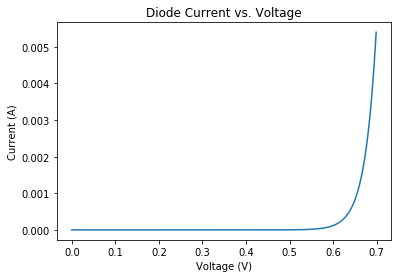

In [3]:
V_d = np.arange(0, 0.7, 0.001)
I_d = I_s * (np.exp(V_d*q/(k*T)) - 1)
plt.plot(V_d, I_d)
plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.title('Diode Current vs. Voltage')
plt.show()

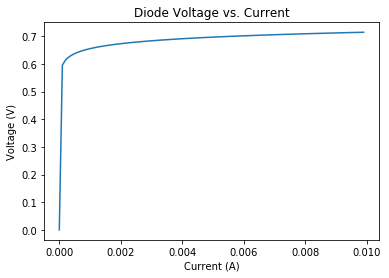

In [4]:
I_d = np.arange(0, 10e-3, 0.1e-3)
V_d = (k*T/q)*np.log((I_d/I_s) + 1)
plt.plot(I_d, V_d)
plt.ylabel('Voltage (V)')
plt.xlabel('Current (A)')
plt.title('Diode Voltage vs. Current')
plt.show()

In [10]:
I_d = 0.3e-6
V_d = (k*T/q)*np.log((I_d/I_s) + 1)
V_d

0.44548231880033395

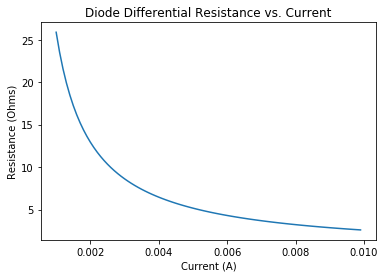

In [5]:
I_d = np.arange(1e-3, 10e-3, 0.1e-3)
R_d = k*T/(q*(I_d + I_s))
plt.plot(I_d, R_d)
plt.ylabel('Resistance (Ohms)')
plt.xlabel('Current (A)')
plt.title('Diode Differential Resistance vs. Current')
plt.show()

## The Bipolar Transistor

Ebers-Moll model (approximation)

$I_e = I_{es} \left(e^{\frac{q V_{be}}{k T}} - 1 \right)$

$I_c = \alpha_F I_e $

$I_b = (1 - \alpha_F) I_e $

$g_m = \frac{d I_c}{d V_{be}} = \alpha_f I_{es} \frac{q}{k T} e^{\frac{q V_{be}}{k T}}$

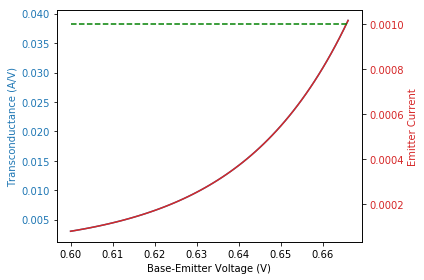

In [6]:
# I_es for 2N3904 is 6.734 fA

I_es = 6.734e-15
V_be = np.arange(0.6, 0.666, 0.001)
beta_f = 100
alpha_f = beta_f/(1 + beta_f)
qkt = q/(k*T)
g_m = alpha_f*I_es * qkt * np.exp(V_be*qkt)
I_e = I_es*(np.exp(V_be*qkt) - 1)
I_b = (1-alpha_f)*I_e

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Base-Emitter Voltage (V)')
ax1.set_ylabel('Transconductance (A/V)', color=color)
ax1.plot(V_be, g_m, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Emitter Current', color=color)  # we already handled the x-label with ax1
ax2.plot(V_be, I_e, color=color)
ax2.tick_params(axis='y', labelcolor=color)

horiz_line_data = np.array([0.001 for i in range(len(V_be))])
ax2.plot(V_be, horiz_line_data, 'g--')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()